# Genre Prediction - Data Wrangling

This project aims to predict the genre of songs given their audio features. Audio features, as well as other track-wise information, are collected from Spotify. Since Spotify API doesn't offer genre information, I turned to [The Sounds of Spotify](https://open.spotify.com/user/thesoundsofspotify) to generate the dataset of songs and their corectly labeled genres that will be used to train the predictive models. More about this music genre project can be found [here](https://artists.spotify.com/blog/how-spotify-discovers-the-genres-of-tomorrow).

### Data Collection

Importing required packages

In [1]:
import os
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import lyricsgenius
from spotify_client import *

Connecting to Spotify API

In [2]:
client_id = '665fe23a8c264e8d969f97d1666c3c49'
client_secret = 'cd9f621c0b904a40b55aae8092ab0bad'
sp = SpotifyAPI(client_id, client_secret)

Initializing the dataframe that will contain all songs from all genres with relevant column names for features

In [3]:
cols = ['track_id', 'track', 'artist', 'album', 'release_date', 'subgenre', 'genre',
        'duration_ms', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'mode']
df = pd.DataFrame(columns=cols)

Helper functions to collect playlist tracks and their audio features for a major genre from each subgenre's playlist

In [4]:
def collect_id(subgenre):
    """Collects playlist ID for given subgenre"""
    playlist_id = str()
    query = 'The Sound of ' + subgenre
    playlists = sp.search(query, search_type='playlist')['playlists']
    for playlist in playlists['items']:
        if query.lower() == playlist['name'].lower():
            playlist_id = playlist['id']
            break
    if (subgenre == 'viral pop'): playlist_id = '0tAsyMQoefUL8DWNn6xkAk'
    if (subgenre == 'classic country pop'): playlist_id = '6lOCvTH6vW5Jc7oyryNom4'
    #print(subgenre + ': ' + str(playlist_id))
    return playlist_id

def collect_songs(subgenres):
    """Collects playlist songs for each subgenre of a major genre"""
    df = pd.DataFrame(columns=cols)
    for sg in subgenres:
        playlist_id = collect_id(sg)
        playlist_tracks = sp.get_playlist_tracks(playlist_id)['items']
        for i in np.arange(0, len(playlist_tracks)):
            track_id = playlist_tracks[i]['track']['id']
            track = playlist_tracks[i]['track']['name']
            artist = playlist_tracks[i]['track']['artists'][0]['name']
            album = playlist_tracks[i]['track']['album']['name']
            release_date = playlist_tracks[i]['track']['album']['release_date']
            duration_ms = playlist_tracks[i]['track']['duration_ms']
            popularity = playlist_tracks[i]['track']['popularity']
            audio_features = sp.get_audio_features(track_id)
            attributes = [track_id, track, artist, album, release_date, sg, subgenres[0].split()[0],
                          pd.to_numeric(duration_ms), pd.to_numeric(popularity),
                          audio_features['danceability'], audio_features['energy'],
                          audio_features['loudness'], audio_features['speechiness'],
                          audio_features['acousticness'], audio_features['instrumentalness'],
                          audio_features['liveness'], audio_features['valence'],
                          audio_features['tempo'], audio_features['mode']]
            df = df.append(pd.Series(attributes, index=cols, name=i))
    return df

Collecting songs of each subgenre for each major genre (retrieved from [here](http://everynoise.com/everynoise1d.cgi?scope=all)). There are seven subgenre playlists per major genre including the major genre itself, and each playlist contains one hundred songs.

**Note**: *Do not leave this window while the cells below are running in order for the API connection to stay open.*

#### Pop Music

In [6]:
pop = collect_songs(['pop', 'dance pop', 'post-teen pop', 'electropop',
                     'viral pop', 'tropical house', 'neo mellow'])
pop.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,27ycaQnQAxaPiyeg3nr2aB,Midnight Sky,Miley Cyrus,Midnight Sky,2020-08-14,pop,pop,223279,92,0.705,0.814,-5.466,0.0346,0.00115,0.003120,0.203,0.2590,110.000,0
1,0prNGof3XqfTvNDxHonvdK,Scars To Your Beautiful,Alessia Cara,Know-It-All (Deluxe),2015-11-13,pop,pop,230226,73,0.573,0.739,-5.740,0.1290,0.02850,0.000000,0.111,0.4510,97.085,1
2,7JDWhC422Gtk1Bq0mL3OTC,feel something,Bea Miller,feel something,2019-06-21,pop,pop,180161,86,0.740,0.415,-8.914,0.0707,0.24200,0.000156,0.319,0.1560,136.029,1
3,1rfofaqEpACxVEHIZBJe6W,Havana (feat. Young Thug),Camila Cabello,Camila,2018-01-12,pop,pop,217306,82,0.765,0.523,-4.333,0.0300,0.18400,0.000036,0.132,0.3940,104.988,1
4,3e7sxremeOE3wTySiOhGiP,Dusk Till Dawn (feat. Sia) - Radio Edit,ZAYN,Icarus Falls,2017,pop,pop,239000,64,0.259,0.437,-6.589,0.0386,0.10200,0.000001,0.106,0.0951,180.042,0


#### R&B

In [7]:
rnb = collect_songs(['r&b', 'urban contemporary', 'hip pop', 'new jack swing',
                     'neo soul', 'pop r&b', 'alternative r&b'])
rnb.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,4iuNZTcvT9diFySSzVsnVS,When I See U,Fantasia,Fantasia,2006-12-09,r&b,r&b,217346,70,0.569,0.596,-6.486,0.1710,0.457,0.00009,0.2050,0.757,93.134,1
1,6BIcjFZIVDZxNAcofRFPx4,So Gone,Monica,After The Storm,2003,r&b,r&b,242773,68,0.618,0.552,-6.863,0.0981,0.176,0.00000,0.2520,0.586,81.975,1
2,4IFYR5smTnHYCLP82AiDrJ,Officially Missing You,Tamia,More,2004,r&b,r&b,242466,54,0.476,0.407,-9.239,0.0368,0.247,0.00000,0.1440,0.226,178.258,0
3,0W4NhJhcqKCqEP2GIpDCDq,Love,Keyshia Cole,The Way It Is,2005-01-01,r&b,r&b,255333,75,0.688,0.519,-4.285,0.0283,0.064,0.00000,0.1000,0.318,116.714,1
4,0rE8OLQpoOFe2xa35twgve,Bust Your Windows,Jazmine Sullivan,Fearless,2008-08-30,r&b,r&b,266306,53,0.683,0.664,-4.233,0.0332,0.538,0.00000,0.0671,0.866,106.991,0


#### Rap

In [10]:
rap = collect_songs(['rap', 'pop rap', 'hip hop', 'trap', 'melodic rap',
                     'alternative hip hop', 'gangster rap'])
rap.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,6EDO9iiTtwNv6waLwa1UUq,POPSTAR (feat. Drake),DJ Khaled,POPSTAR (feat. Drake),2020-07-17,rap,rap,200221,93,0.800,0.560,-4.818,0.2610,0.05700,0,0.134,0.4500,163.071,0
1,2IRZnDFmlqMuOrYOLnZZyc,Going Bad (feat. Drake),Meek Mill,Championships,2018-11-30,rap,rap,180522,82,0.889,0.496,-6.365,0.0905,0.25900,0,0.252,0.5440,86.003,0
2,33gwZOGJWEZ7dRWPqPxBEZ,Wolves (feat. Post Malone),Big Sean,Detroit 2,2020-09-04,rap,rap,199758,85,0.724,0.675,-5.267,0.0867,0.09780,9.41e-06,0.351,0.3250,160.048,1
3,2G1tXoGBaEMJ7FKGnkf6ud,Wake Up in the Sky,Gucci Mane,Evil Genius,2018-12-07,rap,rap,203161,70,0.800,0.578,-5.144,0.0485,0.00381,0,0.367,0.3670,143.010,0
4,5esKpsrB3TbGHwFaAjIGMx,Move Ya Hips (feat. Nicki Minaj & MadeinTYO),A$AP Ferg,Move Ya Hips (feat. Nicki Minaj & MadeinTYO),2020-07-30,rap,rap,146009,77,0.809,0.680,-4.883,0.2220,0.05350,1.2e-06,0.110,0.0653,143.988,1


#### Latin

In [11]:
latin = collect_songs(['latin', 'latin pop', 'reggaeton', 'tropical',
                     'mexican pop', 'colombian pop', 'latin hip hop'])
latin.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,0cRgJuB6TRtb5RZ2HkjSLh,Anaranjado,Jowell & Randy,Viva el Perreo,2020-08-06,latin,latin,212010,74,0.763,0.580,-6.196,0.1440,0.0466,0.000016,0.1540,0.608,175.937,1
1,5kQre7o8ky5DXeEPcyaCR1,Carita de Inocente (feat. Myke Towers) - Remix,Prince Royce,Carita de Inocente (feat. Myke Towers) [Remix],2020-06-01,latin,latin,192698,82,0.565,0.781,-3.358,0.0610,0.3640,0.000000,0.0984,0.943,129.959,0
2,15OjBeqNX3bShsGYQbteRv,La Tóxica,Farruko,La Tóxica,2020-07-24,latin,latin,180520,87,0.659,0.701,-4.107,0.1640,0.0882,0.000000,0.0866,0.623,91.970,1
3,0VKkyBKCXyR99navhVRqcP,La player (Bandolera),Zion & Lennox,La Player (Bandolera),2018-02-23,latin,latin,249608,75,0.769,0.838,-5.238,0.0633,0.1600,0.000000,0.0935,0.602,93.996,1
4,1KSqYYJFyfTecXFk9M0prc,Escápate Conmigo (feat. Ozuna),Wisin,Victory,2017-12-01,latin,latin,232786,74,0.744,0.859,-3.166,0.0795,0.0256,0.000063,0.0881,0.787,91.977,1


#### Reggae

In [14]:
reggae = collect_songs(['reggae', 'roots reggae', 'dub', 'ska',
                        'modern reggae', 'reggae fusion', 'dancehall'])
reggae.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,0hebjXwdDFHS1kHDQ82HZr,Jah Give Us Life,Wailing Souls,The Very Best Of The Wailing Souls,1987,reggae,reggae,232440,48,0.760,0.568,-12.166,0.0578,0.0521,0.000932,0.0666,0.962,144.678,0
1,0GGPUysb8GpCG76dQH63te,The International Herb,Culture,Too Long In Slavery,1990-01-01,reggae,reggae,200960,54,0.825,0.433,-13.085,0.3370,0.0585,0.000000,0.0618,0.687,127.686,0
2,6r9KZ2g5dXZXXLF6vOHnet,Mellow Mood,Bunny Wailer,Bunny Wailer Sings The Wailers,1980-10-13,reggae,reggae,231733,55,0.730,0.561,-12.851,0.2030,0.0361,0.047300,0.0493,0.691,80.892,1
3,30ELPvO4DH57Rq2kgj7a8e,Marcus Garvey,Burning Spear,Marcus Garvey,1975-02-12,reggae,reggae,207000,57,0.700,0.473,-9.893,0.0687,0.1290,0.000891,0.0452,0.578,91.558,0
4,7ERRjAcL8i6vdKkaRGDdQc,Sinsemilla,Black Uhuru,Sinsemilla,1980-07-01,reggae,reggae,309880,56,0.846,0.564,-10.915,0.0981,0.0176,0.026000,0.0713,0.708,131.250,0


#### EDM

In [15]:
edm = collect_songs(['edm', 'pop edm', 'electro house', 'progressive electro house',
                     'house', 'progressive house', 'big room'])
edm.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,0poEFjyV2iHKtxjdWFwjmS,All Night (feat. Ally Brooke),Afrojack,All Night (feat. Ally Brooke),2020-02-21,edm,edm,166413,67,0.593,0.877,-3.825,0.0677,0.12300,0,0.5030,0.635,123.760,0
1,4ZTTUAjJCd4NMZmIU7RB4c,Midnight (feat. Liam Payne),Alesso,Midnight (feat. Liam Payne),2020-04-08,edm,edm,220140,79,0.587,0.648,-6.927,0.0439,0.05610,0,0.1150,0.281,144.028,0
2,68UW3plyDDNg1dkNIZRezJ,Tinted Eyes (feat. blackbear & 24kGoldn),DVBBS,Tinted Eyes (feat. blackbear & 24kGoldn),2020-06-05,edm,edm,175081,74,0.743,0.801,-4.097,0.0343,0.00598,2.46e-05,0.1780,0.381,121.965,0
3,3oZoXyU0SkDldgS7AcN4y4,Get Low,Dillon Francis,"Money Sucks, Friends Rule",2014-10-22,edm,edm,212773,64,0.674,0.932,-4.424,0.0859,0.02820,0.71,0.6840,0.728,101.033,0
4,6N6BTxTwykM2YI06SeL1ap,Paradise,Nicky Romero,Paradise,2018-09-28,edm,edm,215336,58,0.623,0.681,-3.490,0.0268,0.13900,0,0.0946,0.453,121.980,1


#### Indie

In [16]:
indie = collect_songs(['indie pop', 'indie poptimism', 'indietronica', 'lo-fi',
                     'indie rock', 'modern rock', 'alternative rock'])
indie.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,0GO8y8jQk1PkHzS31d699N,Tongue Tied,Grouplove,Never Trust a Happy Song,2011-09-02,indie pop,indie,218013,82,0.560,0.936,-5.835,0.0439,0.00847,0,0.1610,0.371,112.960,1
1,2cP37n7TZEe0oBxCbZu0KA,New Slang,The Shins,"Oh, Inverted World",2001-06-19,indie pop,indie,231173,71,0.669,0.389,-11.547,0.0306,0.60500,0.16,0.0905,0.649,130.015,1
2,4Sfa7hdVkqlM8UW5LsSY3F,Take a Walk,Passion Pit,Gossamer,2012-07-23,indie pop,indie,264493,71,0.566,0.755,-5.526,0.0368,0.03380,0,0.3150,0.445,101.006,1
3,57i3M29DWoo7RDk0Tf0LZG,Daylight,Matt and Kim,Grand,2009-01-20,indie pop,indie,171333,67,0.570,0.798,-4.920,0.0323,0.10200,0.000128,0.1780,0.671,103.303,1
4,4djIFfof5TpbSGRZUpsTXq,Talk Too Much,COIN,How Will You Know If You Never Try,2017-04-21,indie pop,indie,187133,73,0.598,0.888,-5.119,0.0807,0.00947,0,0.3470,0.482,103.966,1


#### Rock Music

In [17]:
rock = collect_songs(['rock', 'pop rock', 'classic rock', 'mellow gold',
                      'album rock', 'soft rock', 'permanent wave'])
rock.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,3qiyyUfYe7CRYLucrPmulD,Baba O'Riley,The Who,Who's Next,1971-08-14,rock,rock,300400,77,0.489,0.724,-8.367,0.0352,0.313000,0.185000,0.2870,0.150,117.292,1
1,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,Blue Öyster Cult,Agents Of Fortune,1976,rock,rock,308120,76,0.333,0.927,-8.550,0.0733,0.002900,0.000211,0.2970,0.382,141.470,0
2,1QEEqeFIZktqIpPI4jSVSF,More Than a Feeling,Boston,Boston,1976,rock,rock,285133,79,0.377,0.682,-8.039,0.0299,0.000894,0.002170,0.0504,0.288,108.736,1
3,7N3PAbqfTjSEU1edb2tY8j,Jump - 2015 Remaster,Van Halen,1984 (Remastered),1984-01-04,rock,rock,241599,78,0.572,0.835,-6.219,0.0317,0.171000,0.000376,0.0702,0.796,129.994,1
4,7e89621JPkKaeDSTQ3avtg,Sweet Home Alabama,Lynyrd Skynyrd,Second Helping,1974-04-15,rock,rock,283800,82,0.596,0.605,-12.145,0.0255,0.181000,0.000331,0.0863,0.886,97.798,1


#### Metal

In [18]:
metal = collect_songs(['metal', 'alternative metal', 'nu metal', 'hard rock',
                     'thrash metal', 'death metal', 'glam metal'])
metal.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,27jgTMFbx4HZhwVVpK0tOC,Abigail - Reissue,King Diamond,Abigail,1987,metal,metal,290733,30,0.317,0.937,-5.244,0.0651,0.001740,0.723000,0.3520,0.559,146.584,1
1,6lWFQo5NuR3y8Q6CHIRatA,Elimination,Overkill,The Years Of Decay,1989-10-10,metal,metal,275386,52,0.302,0.805,-11.395,0.0967,0.000849,0.000004,0.1510,0.578,112.766,0
2,6LGoJAyN1xAqF3VJZt0MKx,Evil,Mercyful Fate,Melissa,1983,metal,metal,284960,52,0.282,0.905,-9.455,0.1140,0.000278,0.375000,0.0894,0.554,133.837,1
3,07thLbY0eGli2xWWIPdrN2,Watching over Me - Remixed & Remastered,Iced Earth,Something Wicked This Way Comes,1998-07-13,metal,metal,268906,51,0.508,0.852,-7.842,0.0718,0.001340,0.000000,0.3630,0.184,129.174,1
4,3yNoEJifUJdly8ucYoWRwl,Black Metal,Venom,Black Metal,1982-11-01,metal,metal,221693,51,0.291,0.758,-12.103,0.0556,0.000918,0.000007,0.2910,0.446,80.601,1


#### Country

In [19]:
country = collect_songs( ['country', 'contemporary country', 'country pop', 'classic country pop',
                          'country road', 'country rock', 'modern country rock'])
country.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,7lUE02KHkZM44BZgjCaWRO,Meet In the Middle,Diamond Rio,Diamond Rio,1991-07-01,country,country,198333,67,0.746,0.443,-11.305,0.0359,0.663,0,0.2230,0.554,91.110,1
1,1ipcb9qXpSHWhSUvdxJhsx,"Forever and Ever, Amen",Randy Travis,Always & Forever,1987-05-04,country,country,212640,67,0.677,0.724,-8.992,0.0245,0.143,0.000101,0.1580,0.697,90.392,1
2,2ulBBx6YQ3qY3ci34RadtN,She's In Love With The Boy - Single Version,Trisha Yearwood,Trisha Yearwood,1991-01-01,country,country,248200,65,0.783,0.698,-8.268,0.0323,0.522,2.52e-06,0.0754,0.758,124.996,1
3,0NLBwQBYJhEM9t3KAMPFVR,Sold (The Grundy County Auction Incident),John Michael Montgomery,John Michael Montgomery,1995-03-17,country,country,152186,68,0.771,0.848,-7.365,0.0350,0.108,0,0.3500,0.803,115.642,1
4,3oW6SWwGqiZSPTiAp7ZQoH,It's A Great Day To Be Alive,Travis Tritt,Down The Road I Go,2000-10-01,country,country,241533,70,0.595,0.653,-4.935,0.0265,0.246,0,0.2640,0.542,128.930,1


#### Jazz

In [20]:
jazz = collect_songs(['jazz', 'cool jazz', 'soul jazz', 'bebop',
                      'hard bop','contemporary post-bop', 'big band'])
jazz.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,73A2r5rBa1ke5MdCYZW0jK,A Warm Breeze,Sammy Nestico,A Portrait of Sammy,2009-06-20,jazz,jazz,435253,22,0.572,0.491,-5.224,0.0289,0.762,0.1710,0.1210,0.524,115.240,1
1,6XItPyBew3Fu63crTndGfe,Basie - Straight Ahead,Count Basie,Straight Ahead,1988,jazz,jazz,238693,0,0.436,0.542,-9.313,0.0354,0.426,0.7810,0.0681,0.725,172.162,1
2,7jiRbGgThpGoeh13N5JyNy,"It's Oh, So Nice",Count Basie,Straight Ahead,1988,jazz,jazz,253106,0,0.629,0.404,-10.067,0.0298,0.532,0.8810,0.0279,0.590,115.942,0
3,3XSdnce3xmKC7zSewtglKt,Lonely Street,Count Basie,Straight Ahead,1988,jazz,jazz,175493,0,0.260,0.268,-10.550,0.0303,0.740,0.0196,0.1140,0.256,74.144,0
4,7t2k1Xpbipqx28C6PkEj9n,Fun Time,Count Basie,Straight Ahead,1988,jazz,jazz,235400,0,0.613,0.369,-10.174,0.0310,0.801,0.8210,0.0488,0.562,122.870,1


#### Classical

In [21]:
classical = collect_songs(['classical', 'early music', 'renaissance', 'baroque',
                           'late romantic era', 'post-romantic era', 'early modern classical'])
classical.head()

,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,1upQiytDIEZfl9ItruoXuC,Handel / Orch. Hale: Keyboard Suite in D Minor...,George Frideric Handel,Handel Sarabande,2002,classical,classical,207266,66,0.2040,0.03310,-24.044,0.0487,0.927,0.825,0.0954,0.0547,116.200,0
1,5bu9A6uphPWg39RC3ZKeku,"Goldberg Variations, BWV 988: Aria",Johann Sebastian Bach,"Bach: The Goldberg Variations, BWV 988 (1981 G...",1981,classical,classical,184853,63,0.4540,0.01390,-29.966,0.0514,0.995,0.943,0.0736,0.2440,130.253,0
2,5u5aVJKjSMJr4zesMPz7bL,"Clair de Lune, L. 32",Claude Debussy,Debussy: Clair De Lune and Other Piano Favourites,1994,classical,classical,268000,66,0.3350,0.00532,-31.646,0.0376,0.994,0.912,0.0621,0.0397,65.832,1
3,3MRQn2RYo2VLYMoStnLRxu,"Ravel: Pavane pour une infante défunte, M. 19",Maurice Ravel,Ravel: Complete Works for Solo Piano,2016-01-15,classical,classical,346586,61,0.4910,0.01760,-26.911,0.0644,0.994,0.927,0.0985,0.0901,125.793,0
4,3cc1BpGtocKOEnROApTv8M,"Cello Concerto No. 1 in C Major, Hob. VIIb:1: ...",Franz Joseph Haydn,Haydn: Cello Concertos (Remastered),1981,classical,classical,493800,52,0.0859,0.06530,-24.541,0.0572,0.972,0.889,0.0876,0.0680,61.538,1


Concatenate all major genres together

In [22]:
df = pd.concat([pop, rnb, rap, latin, reggae, edm, indie, rock, metal, country, jazz, classical])
df.release_date = pd.to_datetime([rd.split('-')[0] for rd in df.release_date])
for col in list(df.columns[7:]):
    df[col] = pd.to_numeric(df[col])
df['mode'] = ['major' if mode == 1 else 'minor' for mode in df['mode']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 0 to 99
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          8400 non-null   object        
 1   track             8400 non-null   object        
 2   artist            8400 non-null   object        
 3   album             8400 non-null   object        
 4   release_date      8400 non-null   datetime64[ns]
 5   subgenre          8400 non-null   object        
 6   genre             8400 non-null   object        
 7   duration_ms       8400 non-null   int64         
 8   popularity        8400 non-null   int64         
 9   danceability      8400 non-null   float64       
 10  energy            8400 non-null   float64       
 11  loudness          8400 non-null   float64       
 12  speechiness       8400 non-null   float64       
 13  acousticness      8400 non-null   float64       
 14  instrumentalness  8400 non

Download dataframe to a csv file

In [23]:
df.to_csv('data.csv')

### Data Definitions
Retrieved from [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

In [24]:
data_definitions = pd.DataFrame(columns=['definition'], index=df.columns)
data_definitions.loc['track_id'] = "Unique identifier for each track"
data_definitions.loc['track'] = "Track name"
data_definitions.loc['artist'] = "Artist name"
data_definitions.loc['album'] = "Album name"
data_definitions.loc['release_date'] = "Date released"
data_definitions.loc['subgenre'] = "Sounds of Spotify playlist"
data_definitions.loc['genre'] = "Major genre"
data_definitions.loc['duration_ms'] = "The duration of the track in milliseconds"
data_definitions.loc['popularity'] = "Popularity Score (0-100)"
data_definitions.loc['danceability'] = "How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."
data_definitions.loc['energy'] = "A perceptual measure of intensity and activity on a scale of 0.0 to 1.0 . Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."
data_definitions.loc['loudness'] = "The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db."
data_definitions.loc['speechiness'] = "detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."
data_definitions.loc['acousticness'] = "A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."
data_definitions.loc['instrumentalness'] = "Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."
data_definitions.loc['liveness'] = "Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live."
data_definitions.loc['valence'] = "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."
data_definitions.loc['tempo'] = "The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration."
data_definitions.loc['mode'] = "The modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0."

data_definitions['definition']

track_id                             Unique identifier for each track
track                                                      Track name
artist                                                    Artist name
album                                                      Album name
release_date                                            Date released
subgenre                                   Sounds of Spotify playlist
genre                                                     Major genre
duration_ms                 The duration of the track in milliseconds
popularity                                   Popularity Score (0-100)
danceability        How suitable a track is for dancing based on a...
energy              A perceptual measure of intensity and activity...
loudness            The overall loudness of a track in decibels (d...
speechiness         detects the presence of spoken words in a trac...
acousticness        A confidence measure from 0.0 to 1.0 of whethe...
instrumentalness    

### Data Distributions

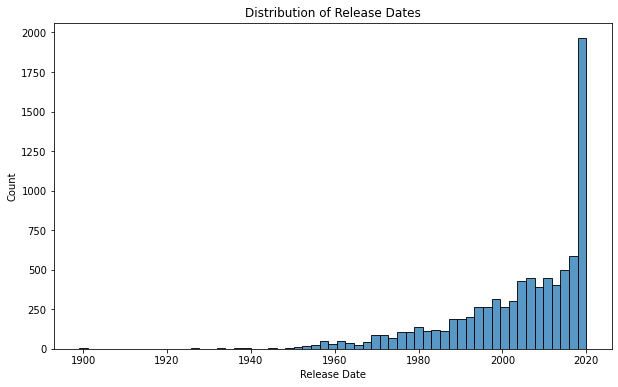

In [25]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Release Dates')
plt.xlabel('Release Date')
sns.histplot(df.release_date)
plt.show()

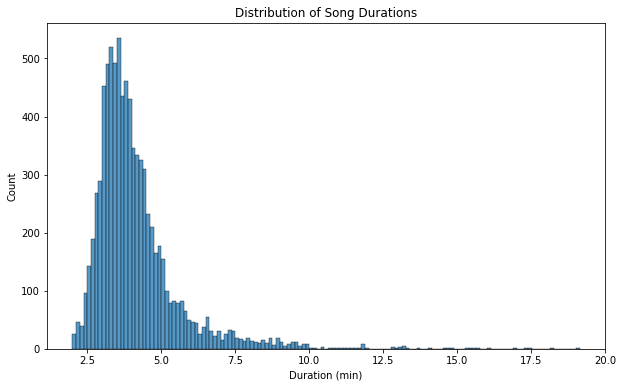

In [26]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (min)')
sns.histplot(df.duration_ms/60000)
plt.show()

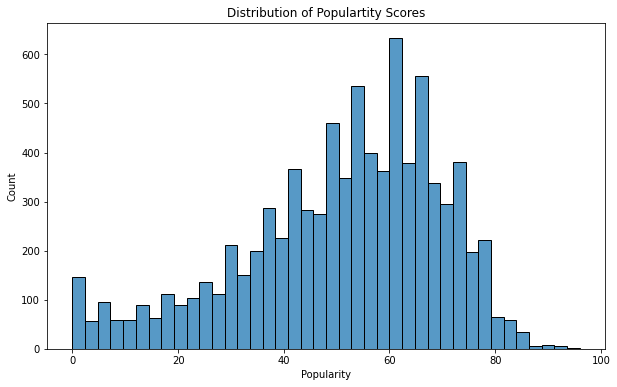

In [27]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Populartity Scores')
plt.xlabel('Popularity')
sns.histplot(df.popularity)
plt.show()

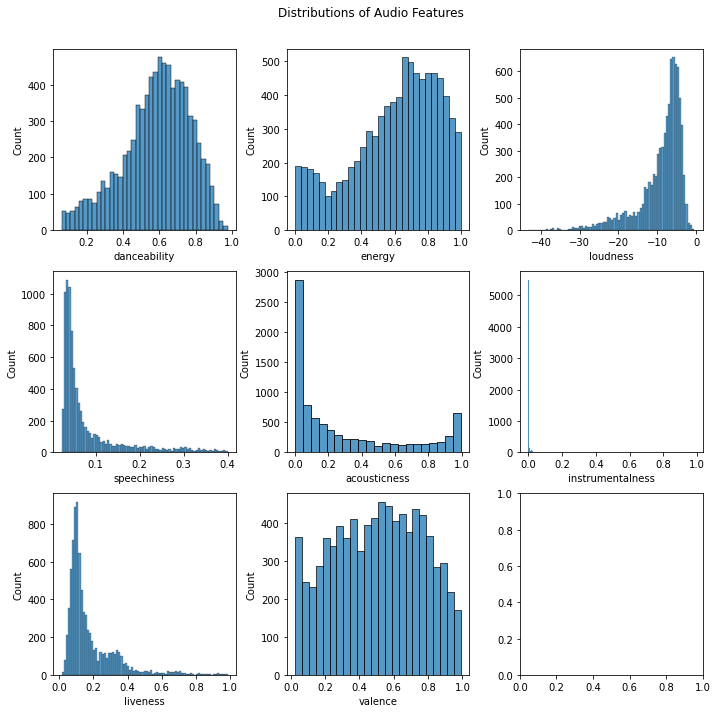

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.suptitle('Distributions of Audio Features')
fig.tight_layout(pad=2.0)
for i, column in enumerate(df.columns[9:17]):
    sns.histplot(df[column],ax=axes[i//3,i%3])